In [161]:
import pandas as pd
df=pd.read_csv('C:\\Users\\jalli\\python\\ToyotaCorolla - MLR.csv')
df.head()
df.dtypes
df.shape


# converting object columns into numerical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])

# assign target variable 
Y=df['Price']
X=df.iloc[: ,1:11]
ss=df.isnull().sum()
print(ss)
X


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
3,26,48000,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,2,86,0,1300,3,4,5,1025
1432,72,19000,2,86,0,1300,3,4,5,1015
1433,71,17016,2,86,0,1300,3,4,5,1015
1434,70,16916,2,86,0,1300,3,4,5,1015


In [59]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# fig,ax=plt.subplots(figsize=(20,20))
# sns.boxplot(df,ax=ax)
df.dtypes

Price          int64
Age_08_04      int64
KM           float64
Fuel_Type      int32
HP             int64
Automatic      int64
cc           float64
Doors          int64
Cylinders      int64
Gears          int64
Weight         int64
dtype: object

In [164]:
# replace outliers with median ,mean or median

import numpy as np
kk=['KM','Age_08_04','Weight']
for i in kk:
    # Calculate quartiles
    Q1 = np.percentile(df[i], 25)
    Q3 = np.percentile(df[i], 75)
    # Calculate IQR
    IQR = Q3 - Q1
    # Define upper and lower whisker lengths
    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = Q1 - 1.5 * IQR
    # finding median 
    median = df[i].median()
    # Identify outliers and replace them with median
    df.loc[df[i]<lower_whisker,i]=median 
    df.loc[df[i]>upper_whisker,i]=median
    # replace nun values with median
    df.fillna(median, inplace=True)


# mode--->cc,Doors,Gears,HP,Automatic,Fuel_Type,
me=['cc','Doors']

for i in me:
    Q1 = np.percentile(df[i], 25)
    Q3 = np.percentile(df[i], 75)
    IQR = Q3 - Q1
    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = Q1 - 1.5 * IQR
    mode = df[i].mode()
    df.loc[df[i]<lower_whisker,i]=mode 
    df.loc[df[i]>upper_whisker,i]=mode
    df.fillna(mode, inplace=True)
    
nn=['Gears','Fuel_Type','HP','Automatic']
for i in nn:
    Q1 = np.percentile(df[i].round(0), 25)
    Q3 = np.percentile(df[i].round(0), 75)
    IQR = Q3 - Q1
    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = Q1 - 1.5 * IQR
    mean = df[i].mean().round(0)
    df.loc[df[i].round(0)<lower_whisker,i]=mean 
    df.loc[df[i].round(0)>upper_whisker,i]=mean
    df.fillna(mean, inplace=True)



In [165]:
# order the columns by correlation value : 'Age_08_04','Weight','KM','HP','cc' and Doors

# assign target variable 
Y=df['Price']
X=df.iloc[: ,1:11]
# X=df[df.columns[[1,2,4,6,7,10]]]
X

from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_SS = SS.fit_transform(X)
X_ss = pd.DataFrame(X_SS)
X_ss.columns = list(X)
X_ss

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.824205,-0.562441,0.0,-0.851980,0.0,0.455845,-1.085139,0.0,0.0,0.172684
1,-1.824205,0.321444,0.0,-0.851980,0.0,-3.132168,-1.085139,0.0,0.0,0.172684
2,-1.769312,-0.742106,0.0,-0.851980,0.0,-3.132168,-1.085139,0.0,0.0,0.172684
3,-1.659525,-0.527904,0.0,-0.851980,0.0,-3.132168,-1.085139,0.0,0.0,0.172684
4,-1.439953,-0.851472,0.0,-0.851980,0.0,-3.132168,-1.085139,0.0,0.0,0.172684
...,...,...,...,...,...,...,...,...,...,...
1431,0.700882,-1.463050,0.0,-1.167158,0.0,-0.219017,-1.085139,0.0,0.0,-1.214369
1432,0.865562,-1.515638,0.0,-1.167158,0.0,-0.219017,-1.085139,0.0,0.0,-1.522603
1433,0.810669,-1.583212,0.0,-1.167158,0.0,-0.219017,-1.085139,0.0,0.0,-1.522603
1434,0.755775,-1.586618,0.0,-1.167158,0.0,-0.219017,-1.085139,0.0,0.0,-1.522603


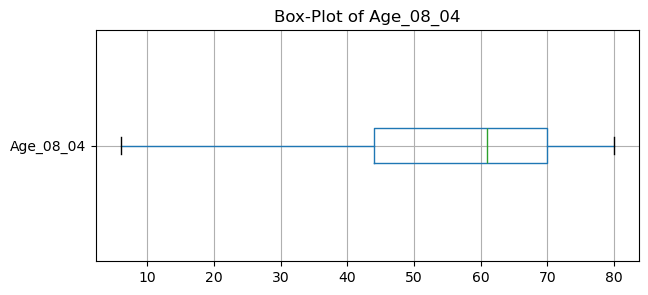

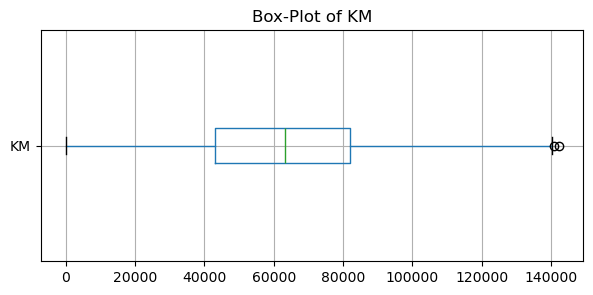

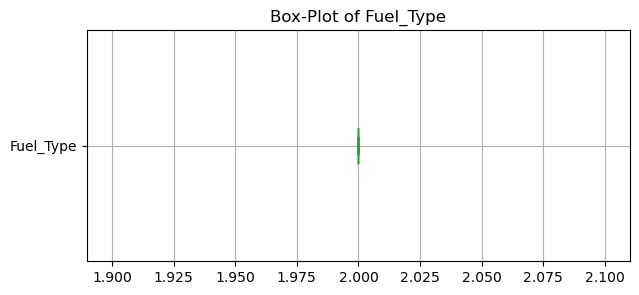

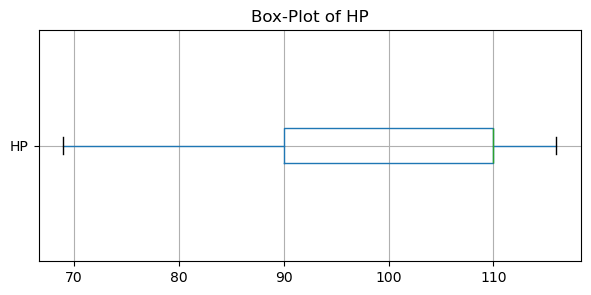

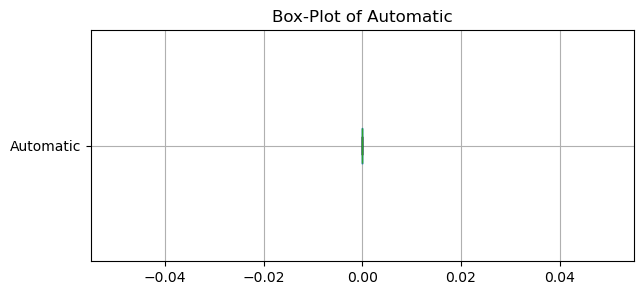

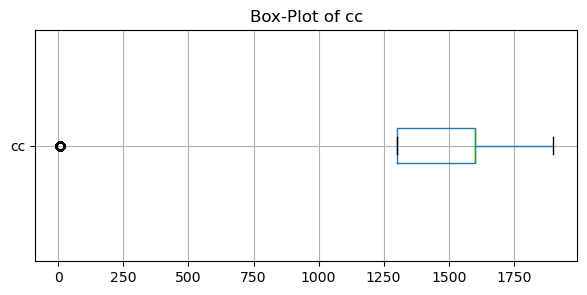

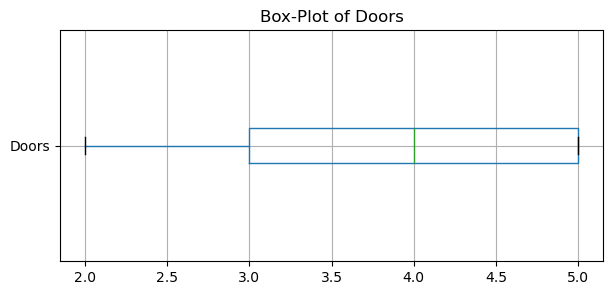

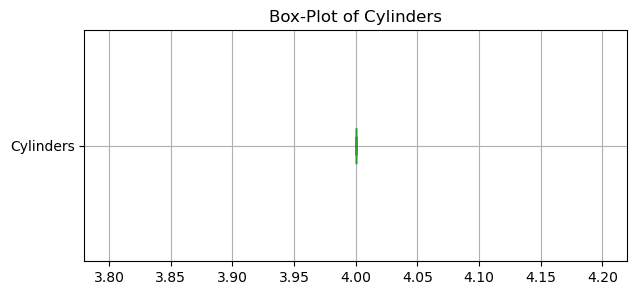

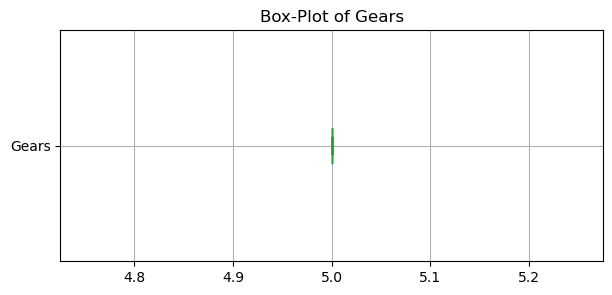

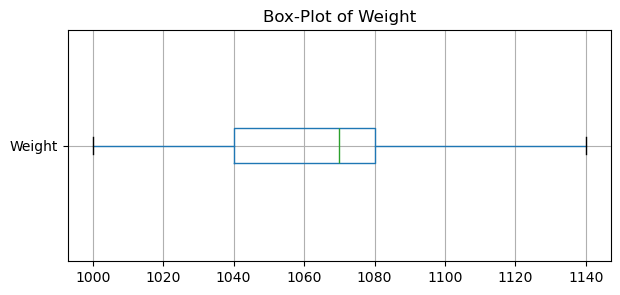

In [93]:
# Box-Plot
import matplotlib.pyplot as plt

# taking numerical columns  and assign to arr
arr=df.iloc[: ,1:11]
# for ploting every individual columns take for loop 
for i in arr:
    # taking ploting dimension as 12x4
    plt.figure(figsize=(7,3))
    # visualizating box-plot taking vert as False mean's printing in horizantial direction
    df.boxplot(column=i,vert=False)
    plt.title(f'Box-Plot of {i}')
    plt.show()

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'Fuel_Type'}>,
        <Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>],
       [<Axes: title={'center': 'cc'}>,
        <Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'Gears'}>,
        <Axes: title={'center': 'Weight'}>, <Axes: >]], dtype=object)

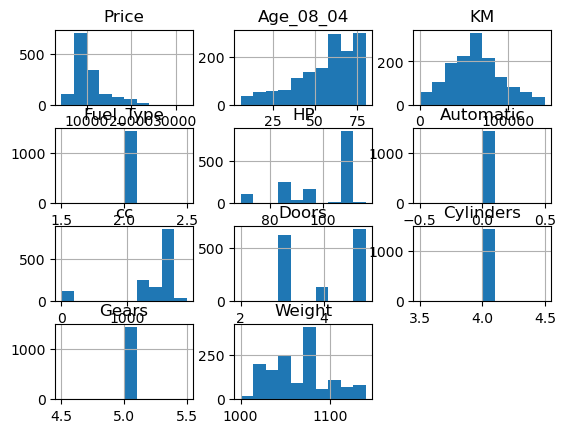

In [94]:
df.hist()

In [97]:
df.corr()
# from the correlation table Target Variable Price have  order correlation value : 'Age_08_04','KM','Weight','HP','Doors',('Gears','Fuel_Type',' Automatic','cc')


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.834702,-0.566605,NaN,0.207484,NaN,-0.032544,0.185326,NaN,NaN,0.374856
Age_08_04,-0.834702,1.000000,0.531366,NaN,-0.092387,NaN,0.002257,-0.137964,NaN,NaN,-0.366768
KM,-0.566605,0.531366,1.000000,NaN,-0.174902,NaN,-0.119422,-0.028465,NaN,NaN,-0.061613
Fuel_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,0.207484,-0.092387,-0.174902,NaN,1.000000,NaN,0.584573,0.136897,NaN,NaN,0.006314
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,-0.032544,0.002257,-0.119422,NaN,0.584573,NaN,1.000000,0.031983,NaN,NaN,-0.178053
Doors,0.185326,-0.137964,-0.028465,NaN,0.136897,NaN,0.031983,1.000000,NaN,NaN,0.427064
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
# Data Partision or spliting Training and Test Data as 80% and 20%

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_ss,Y,test_size=0.2)


In [93]:
# pip install -U scikit-learn

In [167]:
# Build a multiple linear regression model using the training dataset. 
# Interpret the coefficients of the model. Build minimum of 3 different models.

# 3 models 
# 1) Age +HP 
# 2) KM + weight +cc
# 3) km + Doors +cc

# X_train_1=X_train[X_train.columns[[0,2,3,4]]]
X_train_1=X_train[X_train.columns[[0,2]]]
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

# fitting the mode

lr.fit(X_train_1,Y_train)
# lr.fit(X,Y)

# bias
inter=lr.intercept_

# coefficent
coeff=lr.coef_

lr.intercept_ +(lr.coef_*23)
lr.intercept_ +(lr.coef_*76)
print("Age +HP +Fuel +Autoatic")
print("Interpretations of the coefficients:")
print("Intercept (β0): {:.2f}".format(inter))
for i, coef in enumerate(coeff):
    print("Coefficient (β{}): {:.2f}".format(i+1, coef))


# 2)

# X_train_1=X_train[X_train.columns[[1,5,8,9]]]
X_train_1=X_train[X_train.columns[[1,3,5]]]
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

# fitting the mode

lr.fit(X_train_1,Y_train)
# lr.fit(X,Y)

# bias
inter=lr.intercept_

# coefficent
coeff=lr.coef_

lr.intercept_ +(lr.coef_*23)
lr.intercept_ +(lr.coef_*76)
print('KM + weight + GEars +cc')
print("Interpretations of the coefficients:")
print("Intercept (β0): {:.2f}".format(inter))
for i, coef in enumerate(coeff):
    print("Coefficient (β{}): {:.2f}".format(i+1, coef))


# 3)

# X_train_1=X_train[X_train.columns[[1,5,6,8]]]
X_train_1=X_train[X_train.columns[[1,3,4]]]
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

# fitting the mode

lr.fit(X_train_1,Y_train)
# lr.fit(X,Y)

# bias
inter=lr.intercept_

# coefficent
coeff=lr.coef_

lr.intercept_ +(lr.coef_*23)
lr.intercept_ +(lr.coef_*76)
print('km + Doors + Gears + cc')
print("Interpretations of the coefficients:")
print("Intercept (β0): {:.2f}".format(inter))
for i, coef in enumerate(coeff):
    print("Coefficient (β{}): {:.2f}".format(i+1, coef))


Age +HP +Fuel +Autoatic
Interpretations of the coefficients:
Intercept (β0): 10696.64
Coefficient (β1): -3061.72
Coefficient (β2): 0.00
KM + weight + GEars +cc
Interpretations of the coefficients:
Intercept (β0): 10731.44
Coefficient (β1): -2015.51
Coefficient (β2): 794.66
Coefficient (β3): -739.16
km + Doors + Gears + cc
Interpretations of the coefficients:
Intercept (β0): 10712.68
Coefficient (β1): -2003.93
Coefficient (β2): 388.21
Coefficient (β3): 0.00


In [168]:
# Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset



from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_ss,Y)
y_pred=lr.predict(X_ss)

import numpy as np
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y, y_pred)
print('Mean Square error is : ',mse.round(2))
print('Root Mean Square Error is : ',np.sqrt(mse).round(2))


from sklearn.metrics import r2_score
r2=r2_score(Y, y_pred).round(2)
print('R-Square value : ',r2)
print('VIF value : ',(1/(1-r2)))
print('Here we got VIF : <5 thats mean there is no issues in the data and Excellent')


Mean Square error is :  3211130.26
Root Mean Square Error is :  1791.96
R-Square value :  0.76
VIF value :  4.166666666666667
Here we got VIF : <5 thats mean there is no issues in the data and Excellent


In [170]:
# RIDGE regression
from sklearn.linear_model import Ridge
import pandas as pd
X_train,X_test,Y_train,Y_test  = train_test_split(X_ss,Y,test_size = 0.2,random_state=499)
LR.fit(X_train,Y_train)
RR=Ridge(alpha=10)
RR.fit(X_train,Y_train)
RR.coef_
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,Y_train)
df_coef=pd.concat([pd.DataFrame(list(X)),pd.DataFrame(LR.coef_)],axis=1)
df_coef.columns=['','Coefficient']
df_coef['RR_coef']=RR.coef_
df_coef

,,Coefficient,RR_coef
0,Age_08_04,-2.565602e+03,-2534.632081
1,KM,-5.841699e+02,-595.161990
2,Fuel_Type,-2.359002e-12,0.000000
3,HP,6.750308e+02,663.429452
4,Automatic,3.979039e-13,0.000000
5,cc,-4.518014e+02,-440.308100
6,Doors,1.114406e+02,111.479630
7,Cylinders,0.000000e+00,0.000000
8,Gears,0.000000e+00,0.000000
9,Weight,2.518987e+02,262.362660


In [159]:
# droping  Fuel_Type,Automatic,Cylinders,Cylinders
# droping the columns having no correlation relation
finall_X=X_ss.drop(X_ss.columns[[2,4,7,8]],axis=1)
finall_X


In [143]:
# Apply Lasso and Ridge methods on the model.


# RIDGE regression

# Cross validation method
training_loss = []
test_loss = []

for i in range(0,500,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(finall_X,Y,test_size = 0.2,random_state=i)
    LR.fit(X_train,Y_train)
    y_pred_train = LR.predict(X_train)
    y_pred_test = LR.predict(X_test)
    training_loss.append(np.sqrt(mean_squared_error(Y_train,y_pred_train)))
    test_loss.append(np.sqrt(mean_squared_error(Y_test,y_pred_test)))

import numpy as np
print("Ridge- Training  loss: ",np.mean(training_loss).round(2))
print("Ridge- Test loss: ",np.mean(test_loss).round(2))

#
# Ridge- Training  loss:  1784.32
# Ridge- Test loss:  1804.06

Ridge- Training  loss:  1784.32
Ridge- Test loss:  1804.06


In [146]:

#lasso regression
# import the model
from sklearn.linear_model import Lasso
# LS = Lasso(alpha=6)

from sklearn.linear_model import Lasso
LS = Lasso(alpha=300)
X_train,X_test,Y_train,Y_test  = train_test_split(X_ss,Y,test_size = 0.2,random_state=499)
LS.fit(X_train,Y_train)
LS.coef_
# df_coef = pd.concat([pd.DataFrame(list(X_SS)),pd.DataFrame(LR.coef_)], axis=1)
# df_coef

df_coef["LS_coef"] =LS.coef_
df_coef



,0,0,RR_coef,LS_coef
0,Age_08_04,-1.405285e+02,-140.521977,-2477.876761
1,KM,-2.021257e-02,-0.020213,-375.300128
2,Fuel_Type,0.000000e+00,0.000000,0.000000
3,HP,5.259695e+01,52.602831,176.515265
4,Automatic,-4.973799e-14,0.000000,0.000000
5,cc,-1.001635e+00,-1.001382,-0.000000
6,Doors,1.186987e+02,117.281235,0.000000
7,Cylinders,0.000000e+00,0.000000,0.000000
8,Gears,0.000000e+00,0.000000,0.000000
9,Weight,7.956497e+00,7.975964,139.831630


In [157]:
# dropping from LS_coef refrence which shink to 0

 # from X data we are droping 'Fuel_Type,Automatic,Cylinders,Cylinders,'cc','Doors'

finall_X_new=X.drop(X.columns[[2,4,5,6,7,8]],axis=1)

In [158]:
# croos -validation
training_loss = []
test_loss = []

for i in range(0,500,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(finall_X_new,Y,test_size = 0.2,random_state=i)
    LR.fit(X_train,Y_train)
    y_pred_train = LR.predict(X_train)
    y_pred_test = LR.predict(X_test)
    training_loss.append(np.sqrt(mean_squared_error(Y_train,y_pred_train)))
    test_loss.append(np.sqrt(mean_squared_error(Y_test,y_pred_test)))

import numpy as np
print("loggloss- Training  loss: ",np.mean(training_loss).round(2))
print("loggloss- Test loss: ",np.mean(test_loss).round(2))


loggloss- Training  loss:  1844.74
loggloss- Test loss:  1846.3
